## This notebook is for using the MCMC algorithm with idfferent conditions and checking convergence

think of this an examples of waht you would ru in your python environment to get our results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import main data
data_lcparam = pd.read_csv("lcparam_DS17f.txt", sep=" ")
# import systematic error

#these are the core functions: 
#chain gives us results
#plot_chain_behaviour shows the results
#likelihood_test does a brute force sweep of omegas to check the likelihood
from core_mcmc_functions import chain
from core_mcmc_functions import plot_chain_behaviour
from core_mcmc_functions import likelihood_test

In [2]:
#these are not necesarry to import unless you want do systematic error

data_sys = pd.read_csv("sys_DS17f.txt", sep=" ")
data_sys.columns = ["sys_error"]
sys_error_data = np.reshape(pd.Series.to_numpy(data_sys.sys_error), (40, 40))

from prior_likelihood import likelihood
from prior_likelihood import prior

def sys_error_likelihood(params, data):
    return likelihood(params, data, sys_error=sys_error_data)

## Here we run a chain

In [16]:
chn, rej = chain(data_lcparam, 10000, 3000, .005, start_state=[.33, .6, 74, -19.23], variances=None, prior_mode='uniform')

#systematic error chain would look like this
#chn, rej = chain(data_lcparam, 10000, 3000, .01, start_state=[.33, .6, 74, -19.23], variances='systematic', prior_mode='M_gaussian', likelihood_func=sys_error_likelihood )



total trials:6138. accepted 45.7% of trials


## Once you have a chain, you can plot the results using this function:
    it has lots of options, if you look at the docstring

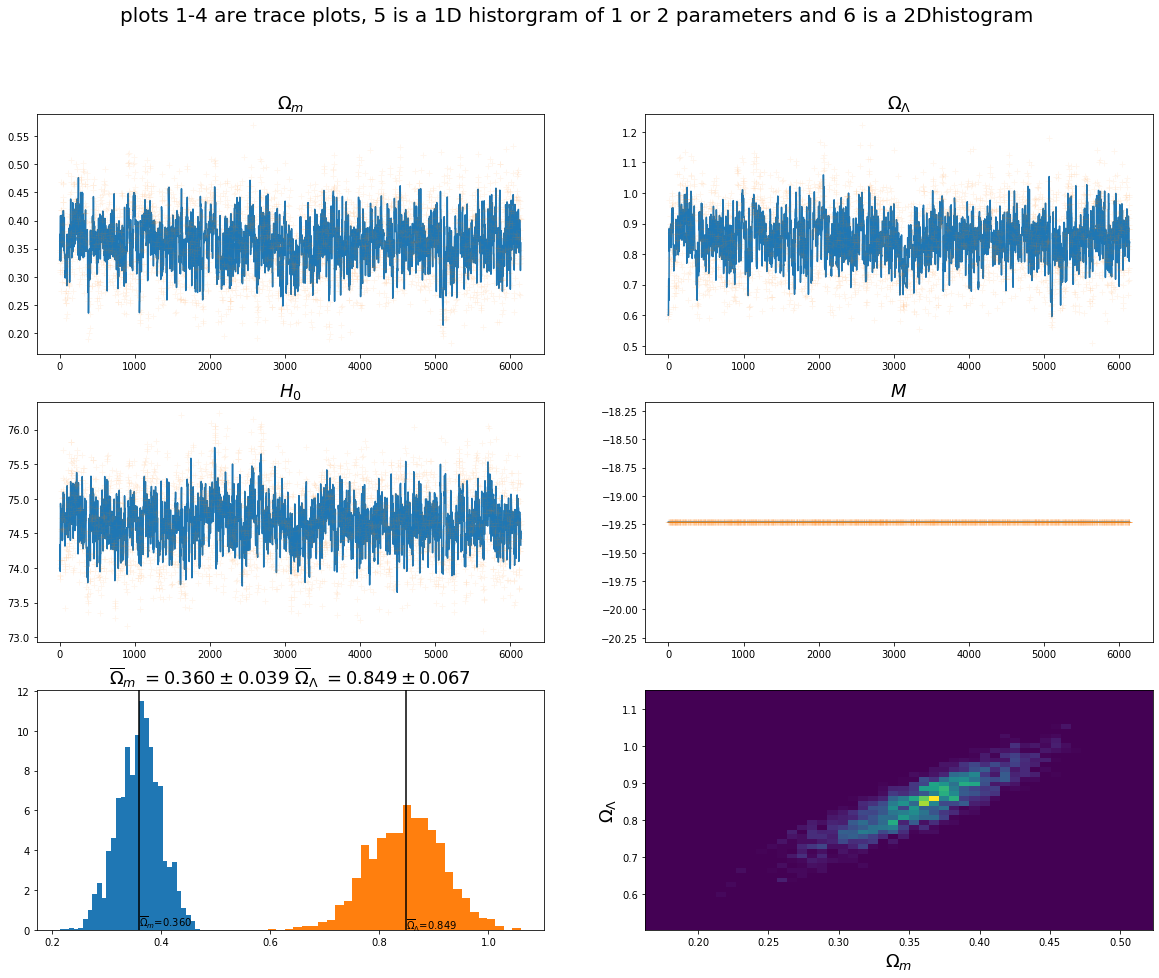

In [17]:
plot_chain_behaviour(chn, rej)

## This is the brute force likelihood test
doesnt rely on the MCMC algorith at all

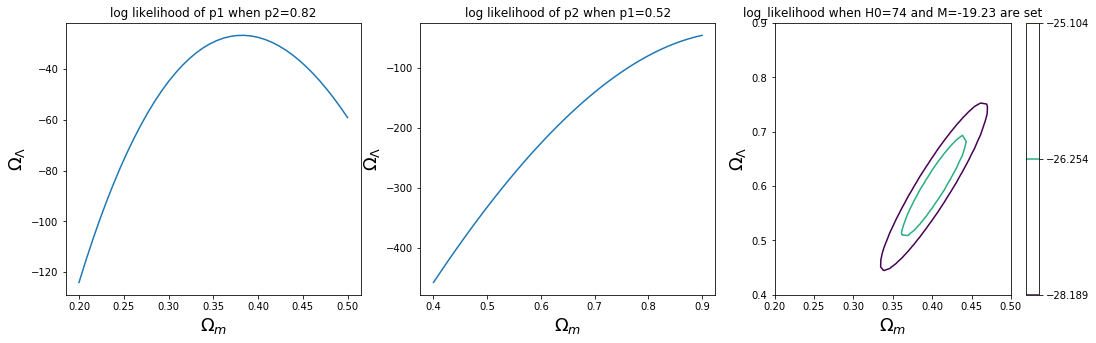

<Figure size 432x288 with 0 Axes>

In [3]:
likelihood_test(data_lcparam, 40, .2, .5, .4, .9, save=True)

these cells are for calculating the covariance matrix from a sample chain 'chn' for better convergence, you can take the result and put it into your chain algorithm if you are trying to increase convergence rates.

In [7]:
cutoff = int(len(chn[:,0])/5)
cchn = chn[cutoff:,:] 
cov=np.cov(cchn, y=None, rowvar=False)
cov=cov/np.max(np.abs(cov))